In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Classificazione delle recensioni di film su IMDB

Lavoreremo col dataset IMDB. Si tratta di 50.000 recensioni di film molto polarizzate, tradde dall'Internet Movie Database. Sono divise in 25.000 recensioni per l'addestramento e altre 25.000 per il test.

In [3]:
# Caricamento dati.
# Il parametro num_words=10000 vuol dire che teniamo traccia solo delle 10.000
# parole più comuni nelle recensioni. Tutte le altre parole vengono ignorate.

imdb = tf.keras.datasets.imdb
(imdb_train_data, imdb_train_labels), (imdb_test_data, imdb_test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


## Preparazione dei dati

In [4]:
# imdb_train_labels è un elenco di 0 ed 1, dove 0 sta per recensione positiva, 1 per negativa

imdb_train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
# imdb_train_data è un elenco di recensioni. Ogni recensione è codifica come un elenco di numeri. I numeri
# da 0 a 2 hanno un significato speciale, quelli da 3 in poi corrispondono ognuno ad una parola diversa.

imdb_train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Non possiamo fornire alla rete neurale come input un elenco di numeri di lunghzza variabile per ogni recensione. La dimensione dell'input dovrebbe essere sempre la stessa. Allora trasformiamo l'input da una sequenza di numeri ad un vettore di 10.000 valori binari. La poizione i-esima del vettore sarà 1 se la parola i-esima fa parte della recensione, 0 altrimenti.

In [6]:
# Definiamo una funzione che esegue la trasformazione vista sopra. Chiamiamo l'insieme di
# dati modificato x_train (ed x_test). L'uso di questi nomi per indicare i dati di addestramento
# e di test è abbastanza comune.

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(imdb_train_data)
x_test = vectorize_sequences(imdb_test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Per omogenità, chiamiamo le etichette di addestramento e di test con i nomi y_train e y_test

y_train = imdb_train_labels
y_test = imdb_test_labels

In [9]:
# Dividiamo l'insieme di training in un insieme di training parziale (x_partial_train) formato dalle recensioni
# dalla 10.000 in poi, e in un insieme di validazione formato dalle prime 10.000 recensioni. Stessa cosa per le
# etichette.

x_val = x_train[:10000]
x_partial_train = x_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:]

# Addestramento

In [10]:
# Addestriamo sull'insieme di addestramento parziale e validiamo i risultati con l'insieme di validazione

imdb_network = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history = imdb_network.fit(x_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5024 - accuracy: 0.7783 - val_loss: 0.3592 - val_accuracy: 0.8746
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2888 - accuracy: 0.9030 - val_loss: 0.2933 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2138 - accuracy: 0.9285 - val_loss: 0.2747 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1683 - accuracy: 0.9462 - val_loss: 0.2867 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1329 - accuracy: 0.9581 - val_loss: 0.2944 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1127 - accuracy: 0.9641 - val_loss: 0.2977 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0884 - accuracy: 0.9737 - val_loss: 0.3278 - val_accuracy: 0.8779
Epoch 8/20
30

In [11]:
imdb_network.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7639 - accuracy: 0.8524


[0.7639040350914001, 0.8523600101470947]

In [12]:
# Definiamo una funzione per visualizzare l'andamento dell'errore e dell'accuratezza sia
# per l'insieme di addestramento che per quello di validazione

def display_loss_and_accuracy_withval(history):
  history_dict = history.history

  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(loss_values) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

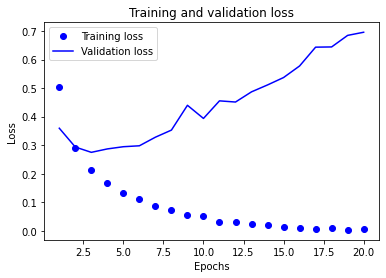

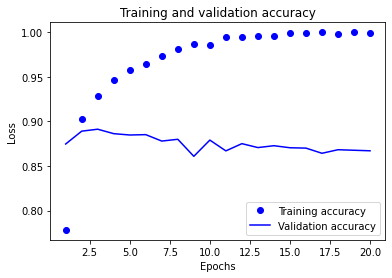

In [13]:
display_loss_and_accuracy_withval(imdb_history)

Una volta individuata l'epoca migliore (la numero 3), riaddestriamo la rete usando l'insieme di training completo, e valutiamo l'accuratezza sull'insieme di test.

In [15]:
imdb_network_full = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network_full.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history_full = imdb_network_full.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
49/49 [==============================] - 2s 30ms/step - loss: 0.4589 - accuracy: 0.8103
Epoch 2/3
49/49 [==============================] - 1s 29ms/step - loss: 0.2581 - accuracy: 0.9076
Epoch 3/3
49/49 [==============================] - 1s 28ms/step - loss: 0.2008 - accuracy: 0.9270


In [16]:
imdb_network_full.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2936 - accuracy: 0.8830


[0.29359811544418335, 0.8830000162124634]

# Ridurre l'overfitting

Vediamo alcune tecniche standard per cercare di ridurre l'overfitting.

## Semplificare la rete

Il modo più immediato per ridurre l'overfitting è semplificare la rete neurale. L'overfitting è causato dal fatto che la rete è così complessa che riesce a "imparare a memoria" le caratteristiche peculiari dell'insieme di dati di addestramento, e non ha bisogno di "generalizzare". Proviamo con una nuova rete con strati interni di 4 neuroni.

In [17]:
imdb_network2 = tf.keras.models.Sequential([
   tf.keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(4, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network2.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history2 = imdb_network2.fit(
  x_partial_train,
  y_partial_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6502 - accuracy: 0.7247 - val_loss: 0.6003 - val_accuracy: 0.7952
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5462 - accuracy: 0.8459 - val_loss: 0.5098 - val_accuracy: 0.8469
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4515 - accuracy: 0.8797 - val_loss: 0.4330 - val_accuracy: 0.8655
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3731 - accuracy: 0.8969 - val_loss: 0.3747 - val_accuracy: 0.8738
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3121 - accuracy: 0.9070 - val_loss: 0.3336 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2669 - accuracy: 0.9175 - val_loss: 0.3069 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2323 - accuracy: 0.9275 - val_loss: 0.2912 - val_accuracy: 0.8881
Epoch 8/20
30

In [18]:
# Definiziamo una funzione che confronta l'andamento della funzione di loss
# e dell'accuratezza al variare delle epoche tra il modello originale (rosso)
# e quello nuovo (blu).

def display_network_comparison(original, new):
  epochs = range(1, len(original.history['val_loss']) + 1)

  plt.plot(epochs, original.history['val_loss'], 'r', label='Original model')
  plt.plot(epochs, new.history['val_loss'], 'b', label='New model')

  plt.title('Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, original.history['val_accuracy'], 'r', label='Original model')
  plt.plot(epochs, new.history['val_accuracy'], 'b', label='New model')

  plt.title('Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

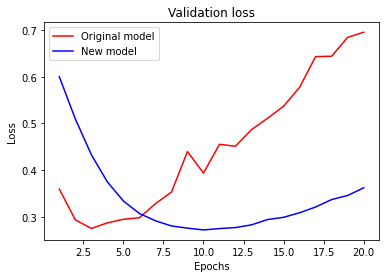

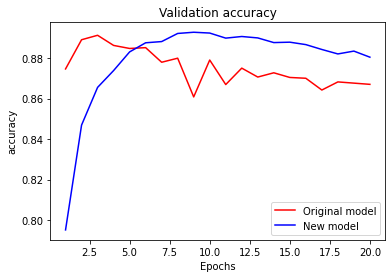

In [19]:
display_network_comparison(imdb_history, imdb_history2)

Vediamo che la rete più semplice va in overfitting dopo e degrada più lentamente. Se, di contro, rendiamo la rete più complessa, il comportamento è piuttosto strano.

In [22]:
imdb_network3 = tf.keras.models.Sequential([
   tf.keras.layers.Dense(512, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network3.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history3 = imdb_network3.fit(
  x_partial_train,
  y_partial_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 10s 322ms/step - loss: 0.5479 - accuracy: 0.7709 - val_loss: 0.3609 - val_accuracy: 0.8451
Epoch 2/20
30/30 [==============================] - 9s 297ms/step - loss: 0.2581 - accuracy: 0.8936 - val_loss: 0.3262 - val_accuracy: 0.8623
Epoch 3/20
30/30 [==============================] - 9s 296ms/step - loss: 0.1444 - accuracy: 0.9472 - val_loss: 0.3369 - val_accuracy: 0.8681
Epoch 4/20
30/30 [==============================] - 9s 298ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.3834 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 9s 297ms/step - loss: 0.1043 - accuracy: 0.9802 - val_loss: 0.3582 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 9s 294ms/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.5215 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 9s 298ms/step - loss: 3.2488e-04 - accuracy: 1.0000 - val_loss: 0.6133 - val_accuracy: 0.8858
E

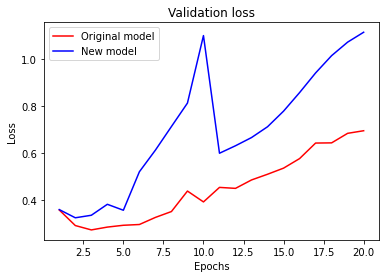

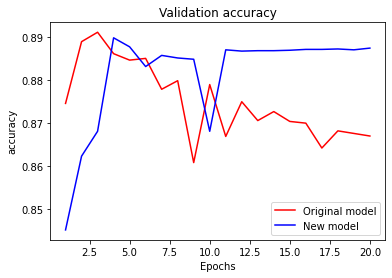

In [23]:
display_network_comparison(imdb_history, imdb_history3)

## Regolarizzare i pesi

Un altro modo per ridurre l'overfitting è quello di cercare di ottenere reti con pesi piccoli (più vicini a 0). Pesi molto grandi tendono infatti a rendere la rete altamente sensibile a piccole variazioni degli input.

Per realizzare ciò, si può modificare la funzione di loss in modo da aggiungere un termine che dipenda dal valore dei pesi. Tipicamente si parla di:

*   Regolarizzazione L1: il costo aggiunto è proporzionale alla somma dei valori assoluti dei pesi
*   Regolarizzazione L2: il costo aggiunto è proporzionale alla somma dei quadrati dei pesi

In Keras, la regolarizzazione si ottiene aggiungendo il parametro `kernel_regularizer` agli strati della rete neurale.





Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5598 - accuracy: 0.7919 - val_loss: 0.4660 - val_accuracy: 0.8280
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3701 - accuracy: 0.8991 - val_loss: 0.3624 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3008 - accuracy: 0.9181 - val_loss: 0.3430 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2627 - accuracy: 0.9306 - val_loss: 0.3294 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2426 - accuracy: 0.9367 - val_loss: 0.3413 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2288 - accuracy: 0.9419 - val_loss: 0.3787 - val_accuracy: 0.8716
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2135 - accuracy: 0.9510 - val_loss: 0.3464 - val_accuracy: 0.8845
Epoch 8/20
30

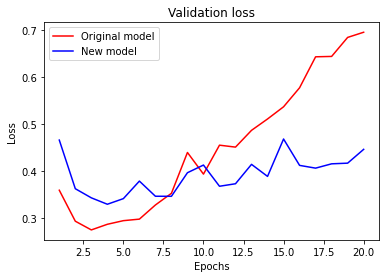

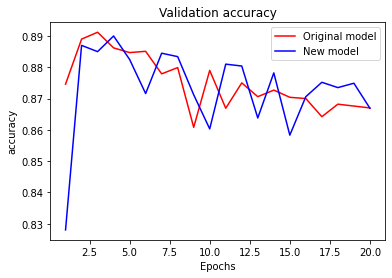

In [24]:
# Ecco la stessa rete con regolarizzazione L2. Il valore 0.001 è il coefficiente per cui moltiplicare
# la somma dei pesi al quadrato prima di aggiungerlo alla funzione di loss. Valori elevati danno più
# importanza ai pesi rispetto che alla funzione di loss originale, viceversa per valori piccoli.

imdb_network4 = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(10000,)),
   tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network4.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history4 = imdb_network4.fit(
  x_partial_train,
  y_partial_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

display_network_comparison(imdb_history, imdb_history4)

## Dropout

Il *dropout* consiste nel mettere a zero, in maniera casuale, alcuni degli output di uno strato intermedio. Il *valore di dropout* è la percentuale di output da azzerare.

Il dropout sembra una tecnica bizzarra... l'idea è che mettendo casualmente a zero alcuni output gli strati succesivi non possono fare troppo affidamento a nessun neurone specifico di quelli precedenti, ma devono cercare di sfruttare tutte le informazioni disponibili.

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6299 - accuracy: 0.6318 - val_loss: 0.5114 - val_accuracy: 0.8486
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5030 - accuracy: 0.7605 - val_loss: 0.3950 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 2s 70ms/step - loss: 0.4242 - accuracy: 0.8120 - val_loss: 0.3512 - val_accuracy: 0.8722
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3625 - accuracy: 0.8589 - val_loss: 0.3008 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3123 - accuracy: 0.8832 - val_loss: 0.2863 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2793 - accuracy: 0.9005 - val_loss: 0.2732 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2451 - accuracy: 0.9195 - val_loss: 0.2757 - val_accuracy: 0.8905
Epoch 8/20
30

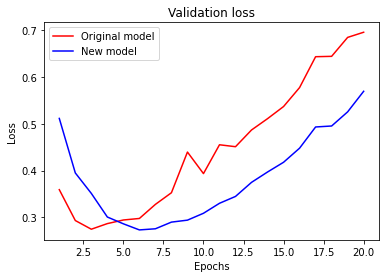

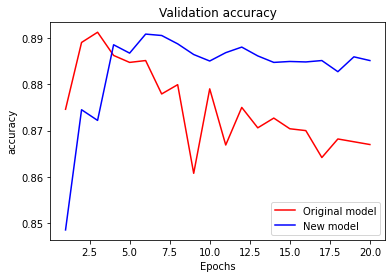

In [25]:
imdb_network5 = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network5.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history5 = imdb_network5.fit(
  x_partial_train,
  y_partial_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

display_network_comparison(imdb_history, imdb_history5)